In [1]:
import pandas as pd
import geopandas as gp
import numpy as np 
import os
import fiona
from statistics import mean, median
import string

# VEST OH 2018
---

## VEST Documentation

### Election Results

#### Sources
Election results from the Ohio Secretary of State (https://www.sos.state.oh.us/elections/election-results-and-data/). 
#### Processing Part 1
The following counties include adjustments to account for corporate annexations that are not specified below by precinct: Adams, Athens, Auglaize, Brown, Butler, Defiance, Franklin, Geauga, Guernsey, Licking, Lorain, Madison, Marion, Miami, Ottawa, Pickaway, Shelby, Stark, Tuscarawas, Warren, Wayne, Wyandot.

This includes the amended Miami County results from January 2019, which reflect 6282 early votes that had gone uncounted.
#### Processing Part 2 (unclear whether this is for election results, shapefiles, or both)
The following additional revisions were made to match the 2018 precinct boundaries:

- **Athens:** Adjust Athens 4-4/4-5, Nelsonville 1/2/3/4
- **Brown:** Adjust Perry Twp South/Villages
- **Butler:** Adjust Hamilton 22/24, Oxford 6/11, Trenton 5/7, West Chester 28/39
- **Champaign:** Adjust Union N/S
- **Clark:** Align New Carlisle, Springfield precincts with county maps
- **Clermont:** Reverse unincorporation of Amelia and Newtonsville
- **Coshocton:** Split Coshocton 3-B/C, 4-B/C
- **Crawford:** Move eastern Polk Twp from Galion 1B to western Polk Twp
- **Cuyahoga:** Adjust Olmsted Twp D/F/H
- **Delaware:** Merge Berlin B/F, Concord F/J, Delaware 3-F/H, Orange G/U, Powell K into G/I, Westerville A/I
- **Fairfield:** Realign precincts in Columbus City, Lancaster Ward 1, Ward 2, Ward 6; Merge Pickerington K/O, Pickerington N into F/L; Adjust Bloom A/B, Lancaster 4-B/C, Pickerington J/K, Violet B/C, I/J
- **Franklin:** Merge Dub 1-I into Dub 1-A/F, Cols 08-A/H, 08-B/G, 12-D/E, 30-A/E, 33-C/J, 45-K/O, 46-G/M, 52-C/H, 73-J/M, 75-E/I, 79-D/E, 82-F/N, 82-I/O, 83-C/J, 83-F/I, Grove City 1-E/G, 2-E/G, Jefferson E/J, Reyns 2-A/G, Worth 3-A/D
- **Fulton:** Split Amboy/Metamora, Fayette/Gorham, Lyons/Royalton, Swancreek West 1/2, Swanton 1/2, Swanton 3/4, York N/S
- **Greene:** Adjust Bath 277/Fairborn 226/Xenia 351
- **Hamilton:** Merge Blue Ash 4-A/B, Norwood 1-A/C, Cincinnati 6-E into 6-A/B, 11-D into 11-A/B/C; Adjust Blue Ash 1-B/2-A/3-B/4-A, Cincinnati 23-A/D, 23-I/P, 25-F/K, Cleves A/Whitewater A, Colerain BB/F/H, Delhi A/B, Loveland D/Symmes C/K, Miami B/D/G, Whitewater A/C; Realign Cincinnati/Green B
- **Knox:** Merge Brinkhaven/Union
- **Lake:** Merge Concord B/O; Adjust Painesville A/K, Willoughby Hills CC/DD
- **Lorain:** Merge N. Ridgeville 3-F/H, N. Ridgeville 1-E into 1-B/D
- **Medina:** Merge Brunswick City 1-F into 1-C/D, Montville Twp H into A/B, Montville Twp I into A/C/E, York Twp C into A/B; Adjust Brunswick City 1-A/B, Wadsworth City 1-D/Sharon D, Wadsworth City 2-D/Twp C
- **Pickaway:** Merge Commercial Point East/West; Add Circleville 1-D; Align Circleville wards with city map
- **Putnam:** Merge Glandorf/Ottawa Twp West
- **Richland:** Adjust Ontario 3/4
- **Stark:** Split Alliance 3-A/C, Canton 2-D/F, 2-E/G, 4-D/E, Massillon 4-A/B, 5-B/C, 7-B/D, 7-H/I, Lake 10/12, Paris A/B, Plain 7/13, Plain 22/23; Merge Lake B into Lake A/15, Lawrence 6 into Lawrence 1/3; Adjust Jackson 6/22, N. Canton 2-A/B, Perry 4/16, Plain 8/29/30
- **Summit:** Adjust Coventry D/G, Hudson 1-B/3-C, South Lebanon A/B, Springfield F/J
- **Union:** Merge Jerome 3/6, Marysville 1/2, Marysville 4 into 3/11, Marysville 15 into 4/9
- **Warren:** Split Springboro City 4-B/D, Deerfield W from Deerfield AA/X, Mason City U from Mason City N/T; Merge Clearcreek B/N, Hamilton A/U, D/T, Turtlecreek L into Turtlecreek A/F, Mason City Z into Mason City F/Deerfield E/Union A; Adjust Carlisle 2-A/3-A, South Lebanon A/B, Springboro 1-B/C, Turtlecreek F/K
- **Wood:** Replace Bloom, Milton, Montgomery, Perry, Portage precincts with 2019 VTDs
- **Wyandot:** Split Sycamore Twp/Village

#### Races

G18USSRREN - Jim Renacci (Republican Party)  
G18USSDBRO - Sherrod Brown (Democratic Party)  

G18GOVRDEW - Mike DeWine (Republican Party)  
G18GOVDCOR - Richard Cordray (Democratic Party)  
G18GOVLIRV - Travis M. Irvine (Libertarian Party)  
G18GOVGGAD - Constance Gadell-Newton (Green Party)  

G18ATGRYOS - Dave Yost (Republican Party)  
G18ATGDDET - Dteve Dettelbach (Democratic Party)  

G18AUDRFAB - Keith Faber (Republican Party)  
G18AUDDSPA - Zach Space (Democratic Party)  
G18AUDLCOO - Robert C. Coogan (Libertarian Party)  

G18SOSRLAR - Frank LaRose (Republican Party)  
G18SOSDCLY - Kathleen Clyde (Democratic Party)  
G18SOSLNAN - Dustin R. Nanna (Libertarian Party)  

G18TRERSPR - Robert Sprague (Republican Party)  
G18TREDRIC - Rob Richardson (Democratic Party)  

### Shapefiles

#### Sources
Precinct shapefile from the U.S. Census Bureau's 2020 Redistricting Data Program final release. Note that some VTDs were relabeled to match precinct names and/or precinct codes in the November 2018 general election returns.

# Election Result Processing

## Get VEST file and FIPS dictionary ready

### Load in VEST file

In [2]:
vest_oh_18 = gp.read_file("./raw-from-source/VEST/oh_2018/oh_2018.shp")

In [3]:
vest_oh_18.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<AxesSubplot:>

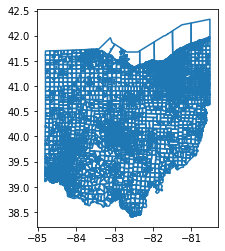

In [4]:
vest_oh_18.boundary.plot()

In [5]:
vest_oh_18.columns

Index(['STATEFP18', 'COUNTYFP18', 'VTDST18', 'PRECINCT18', 'GEOID18', 'NAME18',
       'G18USSRREN', 'G18USSDBRO', 'G18GOVRDEW', 'G18GOVDCOR', 'G18GOVLIRV',
       'G18GOVGGAD', 'G18ATGRYOS', 'G18ATGDDET', 'G18AUDRFAB', 'G18AUDDSPA',
       'G18AUDLCOO', 'G18SOSRLAR', 'G18SOSDCLY', 'G18SOSLNAN', 'G18TRERSPR',
       'G18TREDRIC', 'geometry'],
      dtype='object')

### Create a FIPs dictionary for OH

In [6]:
#Load in the nationwide FIPS file
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Ohio"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)

#Make the FIPS three digits
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)

#Create the dictionary
oh_fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))

## Load and Clean Election Results

### Load Election Results

Cleaned the `2018-11-06_statewideprecinct_miami.xlsx` file by hand, and created `2018-11-06_statewideprecinct_miami_clean.csv`. No modifications were made to the election results. The U.S. Senate results were pulled from the U.S. Congress tab and merged with the Statewide offices tab. Column names were renamed to match VEST's manually. 

In [7]:
#Load in clean SOS file
elections_2018 = pd.read_csv("./raw-from-source/SOS/2018-11-06_statewideprecinct_miami_clean.csv")

In [8]:
elections_2018.shape

(8904, 21)

In [9]:
elections_2018.head()

,County Name,Precinct Name,Precinct Code,Registered Voters,Total Voters,G18USSDBRO,G18USSRREN,G18GOVDCOR,G18GOVRDEW,G18GOVGGAD,...,G18ATGDDET,G18ATGRYOS,G18AUDLCOO,G18AUDRFAB,G18AUDDSPA,G18SOSDCLY,G18SOSRLAR,G18SOSLNAN,G18TREDRIC,G18TRERSPR
0,Adams,BRATTON TOWNSHIP,AAA,945,543,129,406,119,404,5,...,116,409,14,407,103,104,418,12,108,422
1,Adams,BRUSH CREEK TOWNSHIP,AAB,776,377,107,254,98,254,3,...,90,264,11,257,85,85,263,9,92,262
2,Adams,LOCUST GROVE,AAD,705,433,104,318,81,326,7,...,76,331,15,325,73,79,329,12,73,343
3,Adams,GREEN TOWNSHIP,AAE,416,177,69,98,60,108,1,...,54,107,4,103,58,57,105,2,57,109
4,Adams,JEFFERSON TOWNSHIP,AAG,530,255,82,165,69,166,3,...,65,174,2,172,64,66,173,3,69,170


In [10]:
#Map to the correct FIP
elections_2018["county"]=elections_2018["County Name"].map(oh_fips_dict).fillna(elections_2018["County Name"])

#Print out the FIPS to make sure they all are in the correct format
elections_2018["county"].unique()

array(['001', '003', '005', '007', '009', '011', '013', '015', '017',
       '019', '021', '023', '025', '027', '029', '031', '033', '035',
       '037', '039', '041', '043', '045', '047', '049', '051', '053',
       '055', '057', '059', '061', '063', '065', '067', '069', '071',
       '073', '075', '077', '079', '081', '083', '085', '087', '089',
       '091', '093', '095', '097', '099', '101', '103', '105', '107',
       '109', '111', '113', '115', '117', '119', '121', '123', '125',
       '127', '129', '131', '133', '135', '137', '139', '141', '143',
       '145', '147', '149', '151', '153', '155', '157', '159', '161',
       '163', '165', '167', '169', '171', '173', '175'], dtype=object)

## Compare Election Results Totals

### Compare Total Votes

In [11]:
races = [x for x in vest_oh_18.columns if 'G18' in x]
races

['G18USSRREN',
 'G18USSDBRO',
 'G18GOVRDEW',
 'G18GOVDCOR',
 'G18GOVLIRV',
 'G18GOVGGAD',
 'G18ATGRYOS',
 'G18ATGDDET',
 'G18AUDRFAB',
 'G18AUDDSPA',
 'G18AUDLCOO',
 'G18SOSRLAR',
 'G18SOSDCLY',
 'G18SOSLNAN',
 'G18TRERSPR',
 'G18TREDRIC']

In [12]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_oh_18[i])
    sum_var_2 += np.sum(elections_2018[i])
print(sum_var_1)
print(sum_var_2)

26258074
26258074


### Compare Race Totals

In [13]:
def statewide_totals_check(partner_df,source_df,column_list):
    print("***Statewide Totals Check***")
    for race in column_list:
        if (sum(partner_df[race])- source_df[race].sum() != 0):
            print(race+" has a difference of "+str(sum(partner_df[race])-source_df[race].sum())+" votes")
            print("\tVEST: "+str(sum(partner_df[race]))+" votes")
            print("\tSOURCES: "+str(source_df[race].sum())+" votes")
        else:
            print(race + " is equal", "\tVEST / RDH: " + str(sum(partner_df[race])))

In [14]:
statewide_totals_check(vest_oh_18,elections_2018,races)

***Statewide Totals Check***
G18USSRREN is equal 	VEST / RDH: 2057559
G18USSDBRO is equal 	VEST / RDH: 2358508
G18GOVRDEW is equal 	VEST / RDH: 2235825
G18GOVDCOR is equal 	VEST / RDH: 2070046
G18GOVLIRV is equal 	VEST / RDH: 80055
G18GOVGGAD is equal 	VEST / RDH: 49536
G18ATGRYOS is equal 	VEST / RDH: 2276414
G18ATGDDET is equal 	VEST / RDH: 2086715
G18AUDRFAB is equal 	VEST / RDH: 2156663
G18AUDDSPA is equal 	VEST / RDH: 2008295
G18AUDLCOO is equal 	VEST / RDH: 175962
G18SOSRLAR is equal 	VEST / RDH: 2214273
G18SOSDCLY is equal 	VEST / RDH: 2052098
G18SOSLNAN is equal 	VEST / RDH: 103506
G18TRERSPR is equal 	VEST / RDH: 2308425
G18TREDRIC is equal 	VEST / RDH: 2024194


### Compare County Totals

In [15]:
#Have a matching county column
elections_2018["COUNTYFP18"] = elections_2018["county"]

In [16]:
def county_totals_check(partner_df,source_df,column_list,county_col,full_print=False):
    print("***Countywide Totals Check***")
    print("")
    diff_counties=[]
    for race in column_list:
        diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
        for val in diff[diff != 0].index.values.tolist():
            if val not in diff_counties:
                diff_counties.append(val)
        if len(diff[diff != 0]!=0):   
            print(race + " contains differences in these counties:")
            for val in diff[diff != 0].index.values.tolist():
                county_differences = diff[diff != 0]
                print("\t"+val+" has a difference of "+str(county_differences[val])+" votes")
                print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
                print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
        else:
            print(race + " is equal across all counties")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")

In [17]:
elections_2018.groupby(["COUNTYFP18"]).sum().to_csv("./county_totals.csv")

In [18]:
county_totals_check(vest_oh_18,elections_2018,races,"COUNTYFP18",full_print=False)

***Countywide Totals Check***

G18USSRREN is equal across all counties
G18USSDBRO is equal across all counties
G18GOVRDEW is equal across all counties
G18GOVDCOR is equal across all counties
G18GOVLIRV is equal across all counties
G18GOVGGAD is equal across all counties
G18ATGRYOS is equal across all counties
G18ATGDDET is equal across all counties
G18AUDRFAB is equal across all counties
G18AUDDSPA is equal across all counties
G18AUDLCOO is equal across all counties
G18SOSRLAR is equal across all counties
G18SOSDCLY is equal across all counties
G18SOSLNAN is equal across all counties
G18TRERSPR is equal across all counties
G18TREDRIC is equal across all counties


### Compare Precinct Totals

In [19]:
#Create a unique ID
elections_2018["unique_ID"] = elections_2018["county"]+"-"+elections_2018["Precinct Code"]
vest_oh_18["unique_ID"] = vest_oh_18["COUNTYFP18"]+"-"+vest_oh_18["PRECINCT18"]

In [20]:
#Confirm it's unique
print(elections_2018["unique_ID"].value_counts(dropna=False))
print(vest_oh_18["unique_ID"].value_counts(dropna=False))

155-AIT    1
049-BCF    1
003-ADT    1
041-ABT    1
101-ACK    1
          ..
153-AFR    1
023-AFQ    1
085-AGD    1
165-AFK    1
119-AAY    1
Name: unique_ID, Length: 8904, dtype: int64
049-ACQ    1
129-ACC    1
099-ANV    1
035-BQY    1
003-AFI    1
          ..
093-AIK    1
049-BLD    1
141-AAU    1
069-AAP    1
119-AAY    1
Name: unique_ID, Length: 8912, dtype: int64


In [21]:
#Attempt to join
attempt_one = pd.merge(elections_2018,vest_oh_18,how="outer",on="unique_ID",indicator=True)
print(attempt_one["_merge"].value_counts())

elections_only = attempt_one[attempt_one["_merge"]=="left_only"]
vest_only = attempt_one[attempt_one["_merge"]=="right_only"]

attempt_one[attempt_one["_merge"]=="left_only"].to_csv("./source.csv")
attempt_one[attempt_one["_merge"]=="right_only"].to_csv("./vest.csv")

both          8904
right_only       8
left_only        0
Name: _merge, dtype: int64


In [22]:
#The 8 unjoined all contain 0 total votes
races_x =["unique_ID"]
races_y =["unique_ID"]

for val in races:
    races_x.append(val+"_x")
    races_y.append(val+"_y")

display(elections_only[races_x])
display(vest_only[races_y])

,unique_ID,G18USSRREN_x,G18USSDBRO_x,G18GOVRDEW_x,G18GOVDCOR_x,G18GOVLIRV_x,G18GOVGGAD_x,G18ATGRYOS_x,G18ATGDDET_x,G18AUDRFAB_x,G18AUDDSPA_x,G18AUDLCOO_x,G18SOSRLAR_x,G18SOSDCLY_x,G18SOSLNAN_x,G18TRERSPR_x,G18TREDRIC_x


,unique_ID,G18USSRREN_y,G18USSDBRO_y,G18GOVRDEW_y,G18GOVDCOR_y,G18GOVLIRV_y,G18GOVGGAD_y,G18ATGRYOS_y,G18ATGDDET_y,G18AUDRFAB_y,G18AUDDSPA_y,G18AUDLCOO_y,G18SOSRLAR_y,G18SOSDCLY_y,G18SOSLNAN_y,G18TRERSPR_y,G18TREDRIC_y
8904,093-ZZZ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8905,123-ZZZ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8906,095-ZZZ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8907,043-ZZZ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8908,085-ZZZ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8909,035-ZZZ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8910,133-ZZZ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8911,007-ZZZ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
def precinct_votes_check(merged_df,column_list,vest_on_left,name_col,print_level=0):
    merged_df = merged_df.sort_values(by=[name_col],inplace=False)
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for index,row in merged_df.iterrows():
        same = True
        for i in column_list:
            left_data = i + "_x"
            right_data = i + "_y"
            if ((row[left_data] is None) or (row[right_data] is None) or (np.isnan(row[right_data])or(np.isnan(row[left_data])))):
                print("FIX NaN value at: ", row[name_col])
                return;
            diff = abs(row[left_data]-row[right_data])
            if (diff>0):
                same = False
                diff_values.append(abs(diff))
                if (diff>max_diff):
                    max_diff = diff
            if(diff>print_level):
                if (vest_on_left):
                    print(i, "{:.>72}".format(row[name_col]), "(V)","{:.>5}".format(int(row[left_data]))," (S){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))                           
                else:
                    print(i, "{:.>72}".format(row[name_col]), "(S)","{:.>5}".format(int(row[left_data]))," (V){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))
        if(same != True):
            different_rows +=1
            diff_list.append(row[name_col])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(merged_df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    print("")
    print("All precincts containing differences:")
    diff_list.sort()
    print(diff_list)

In [24]:
precinct_votes_check(attempt_one[attempt_one["_merge"]=="both"],races,False,"unique_ID",print_level=0)


There are  8904  total rows
0  of these rows have election result differences
8904  of these rows are the same

The max difference between any one shared column in a row is:  0
There are  0 precinct results with a difference greater than 10

All precincts containing differences:
[]


# Precinct Shapefile

## Load in the shapefiles

### 2020 TIGER/Line

> Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program final release

Link to the 2020 TIGER/Line files for Ohio, where we can download the VTD file: 
https://www2.census.gov/geo/tiger/TIGER2020PL/STATE/39_OHIO/39/

In [25]:
tiger_vtd = gp.read_file('./raw-from-source/Census/tl_2020_39_vtd20/tl_2020_39_vtd20.shp')

<AxesSubplot:>

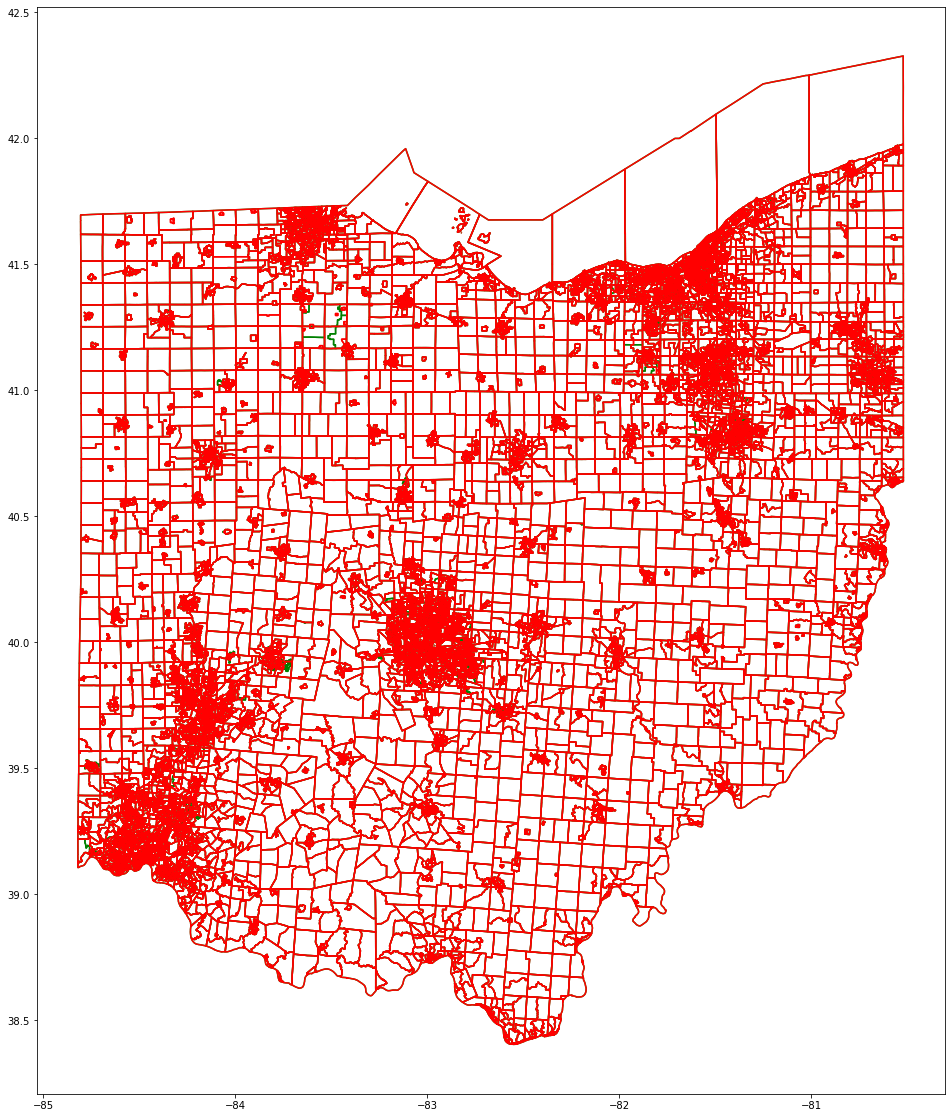

In [26]:
#Plot what they look like on top of one another, looks similar to what VEST has
ax = tiger_vtd.boundary.plot(figsize=(20,20),color="green")
vest_oh_18.boundary.plot(figsize=(20,20),ax=ax,color="red")

With a cursory look, this looks correct. 

### Join to election results

In [27]:
#Create a unique ID
tiger_vtd["unique_ID"] = tiger_vtd["COUNTYFP20"]+"-"+tiger_vtd["VTDST20"].str[3:6]
final_source = pd.merge(elections_2018,tiger_vtd,how="outer",on="unique_ID",indicator=True)

#Confirm the ID is unique
print(tiger_vtd["unique_ID"].value_counts())
print(final_source["_merge"].value_counts())

049-ACQ    1
133-ABV    1
101-ACK    1
035-BUL    1
129-ACC    1
          ..
035-BWP    1
017-AEH    1
133-ADJ    1
025-AEB    1
119-AAY    1
Name: unique_ID, Length: 8941, dtype: int64
both          8871
right_only      70
left_only       33
Name: _merge, dtype: int64


In [28]:
final_source[final_source["_merge"]=="left_only"][["County Name","Precinct Name"]]

,County Name,Precinct Name
1008,Clermont,NEWTONSVILLE VILLAGE
1168,Coshocton,COSHOCTON 3-C
1171,Coshocton,COSHOCTON 4-C
3482,Fulton,METAMORA
3498,Fulton,GORHAM
3501,Fulton,LYONS
3506,Fulton,SWANCREEK WEST TWO
3507,Fulton,SWANTON ONE
3510,Fulton,SWANTON FOUR
3512,Fulton,YORK SOUTH


### Add in the 8 zero-vote precincts (these also appeared in VEST's file)

In [29]:
zero_votes= pd.DataFrame(columns=elections_2018.columns)
zero_votes["County Name"]=['Lorain','Ottawa','Lucas','Erie','Lake','Cuyahoga','Portage','Ashtabula']
zero_votes["Precinct Name"] = ["Voting District Not Defined"] * 8
zero_votes["Precinct Code"] = ["ZZZ"] * 8
for val in races:
    zero_votes[val] = [0] * 8
zero_votes["county"] = ["093","123","095","043","085","035","133","007"]
zero_votes["unique_ID"] = zero_votes["county"]+"-"+zero_votes["Precinct Code"]

In [30]:
#Join them
elections_final = pd.concat([elections_2018,zero_votes])
elections_final.reset_index(inplace=True,drop=True)

### Final election results and shapefile join

In [31]:
final_source = pd.merge(elections_final,tiger_vtd,how="outer",on="unique_ID",indicator=True)
final_source["_merge"].value_counts()

both          8879
right_only      62
left_only       33
Name: _merge, dtype: int64

### Join to VEST

In [32]:
final_merge = pd.merge(vest_oh_18,final_source[final_source["_merge"]=="both"],indicator="final_merge",how="outer",on="unique_ID")
final_merge["final_merge"].value_counts()

both          8879
left_only       33
right_only       0
Name: final_merge, dtype: int64

In [33]:
#Create a column for printing in the below code
final_merge["shape_print"]=final_merge["County Name"]+"-"+final_merge["Precinct Name"]

In [38]:
final_merge.sort_values(["shape_print"],inplace=True)

In [39]:
both = final_merge[final_merge["_merge"]=="both"]
source_geoms = gp.GeoDataFrame(both,geometry="geometry_x",crs=vest_oh_18.crs)
vest_geoms = gp.GeoDataFrame(both,geometry="geometry_y",crs=vest_oh_18.crs)
source_geoms = source_geoms.to_crs(epsg=3857)
vest_geoms = vest_geoms.to_crs(epsg=3857)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

True     8389
False     490
dtype: int64


1) For Butler-OXFORD 12 difference in area is 0.21281941929251635
2) For Butler-OXFORD 3 difference in area is 0.10061173866921652
3) For Butler-OXFORD TWP 1 difference in area is 0.10061173866921655
4) For Butler-OXFORD TWP 3 difference in area is 0.33052006003650497
5) For Clark-PRECINCT CARL 1 difference in area is 0.2338836758512383
6) For Clark-PRECINCT CITY 1 difference in area is 0.9479387895957032
7) For Clark-PRECINCT CITY 21 difference in area is 0.2987446878782234
8) For Clark-PRECINCT CITY 26 difference in area is 0.15151162359073295
9) For Clark-PRECINCT CITY 32 difference in area is 0.22617407855618127
10) For Clark-PRECINCT CITY 7 difference in area is 0.2218617975251973
11) For Clark-PRECINCT GERM 3 difference in area is 0.1399656059989714
12) For Clark-PRECINCT PIKE 1 difference in area is 0.171150111404867
13) For Clark-PRECINCT T-4 difference in area is 0.22186179752519727
14) For Clark-PRECINCT T-6 difference in area is 0.9777300601274321
15) For Clark-PRECINCT T-7 

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:384: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


22) For Delaware-PRECINCT BERLIN B difference in area is 1.7324136399358074
23) For Delaware-PRECINCT CONCORD F difference in area is 0.20336297377573248
24) For Delaware-PRECINCT DELAWARE CITY 3-F difference in area is 0.21539320776496054
25) For Delaware-PRECINCT ORANGE G difference in area is 0.9566436243471116
26) For Delaware-PRECINCT POWELL G difference in area is 0.1212459729449125
27) For Delaware-PRECINCT POWELL I difference in area is 0.3738459747685361
28) For Delaware-PRECINCT WESTERVILLE CITY A difference in area is 0.47483034375230343
29) For Fairfield-BLOOM A difference in area is 0.5349948011068085
30) For Fairfield-BLOOM B difference in area is 0.5237751788160528
31) For Fairfield-COLUMBUS CITY B difference in area is 0.11023643237460673
32) For Fairfield-LANCASTER CITY 1-B difference in area is 0.3198635538711713
33) For Fairfield-LANCASTER CITY 1-C difference in area is 1.8701418374648835
34) For Fairfield-LANCASTER CITY 2-A difference in area is 0.19715988916000549


136) For Warren-TURTLECREEK TWP F difference in area is 2.089106210844151
137) For Warren-TURTLECREEK TWP K difference in area is 0.7251499248074897
138) For Warren-UNION TWP A difference in area is 0.23258903718157112
139) For Wood-MILTON TWP NORTH difference in area is 8.352330438785195
140) For Wood-MONTGOMERY TWP difference in area is 5.147280180874038
141) For Wood-MONTGOMERY TWP BRADNER VILL difference in area is 2.2807912118214952
142) For Wood-MONTGOMERY TWP RISINGSUN VILL difference in area is 2.718514376382552
143) For Wood-PERRY TWP EAST difference in area is 8.750505852575431
144) For Wood-PERRY TWP PERRY difference in area is 8.750508323569044
145) For Wood-PORTAGE TOWNSHIP difference in area is 1.6299103912726622
146) For Wood-PORTAGE VILLAGE difference in area is 1.401606513586888
147) For Wyandot-SYCAMORE TS difference in area is 0.2893466748543453


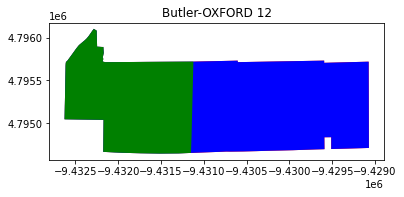

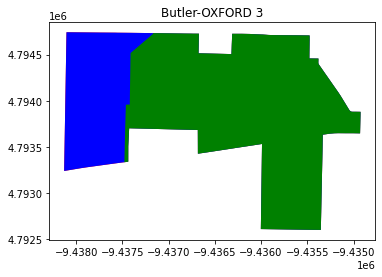

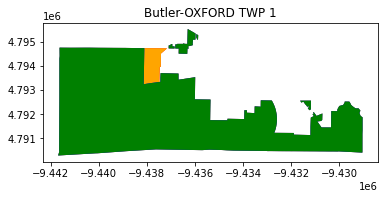

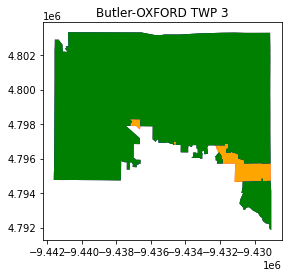

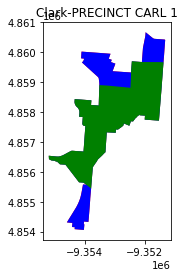

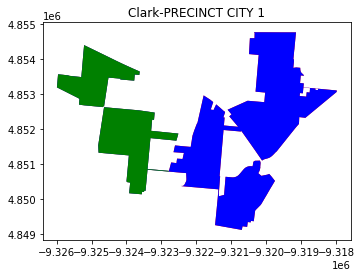

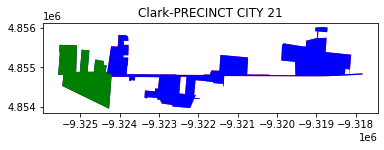

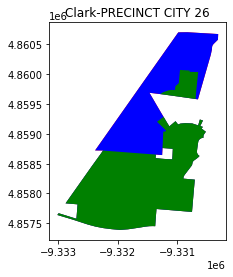

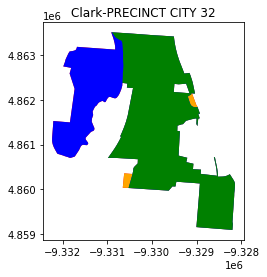

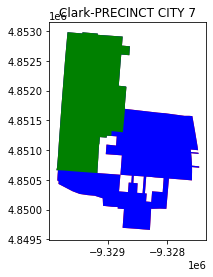

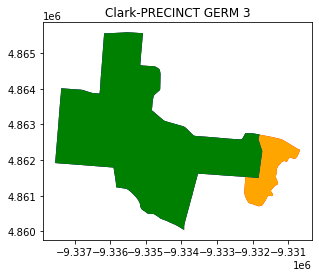

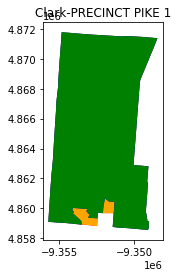

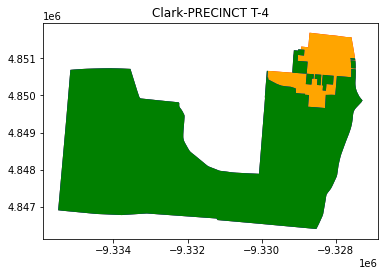

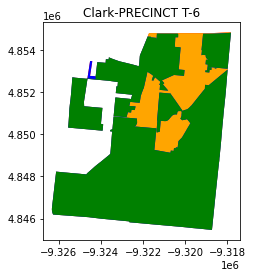

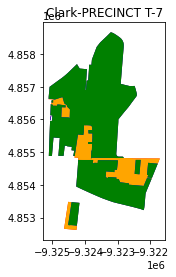

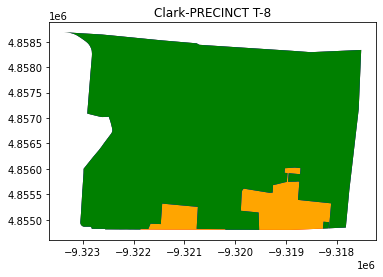

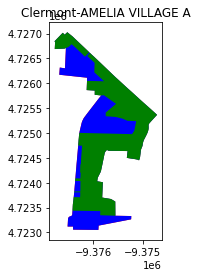

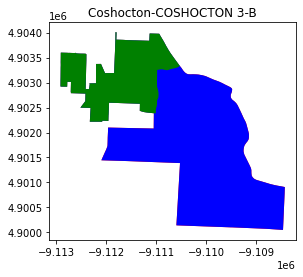

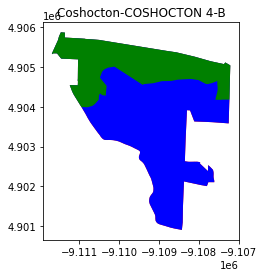

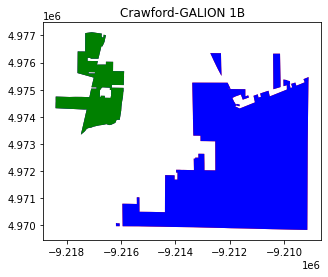

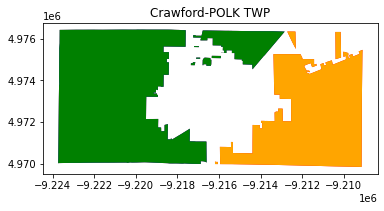

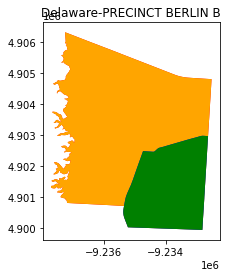

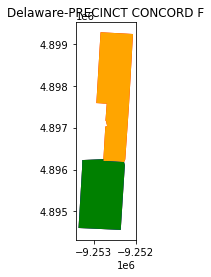

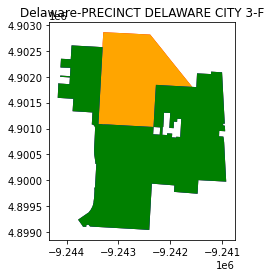

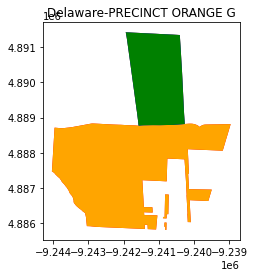

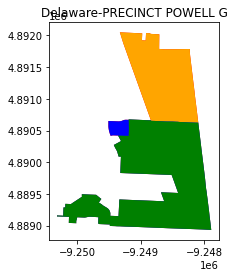

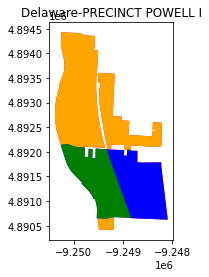

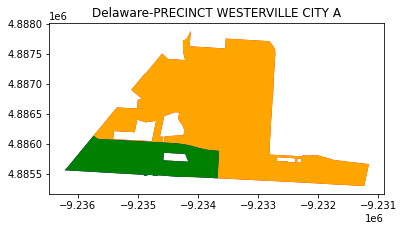

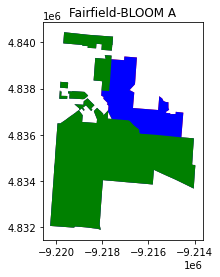

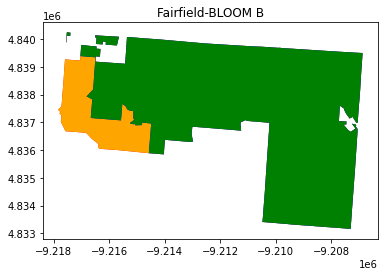

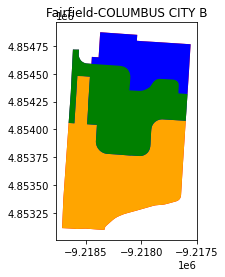

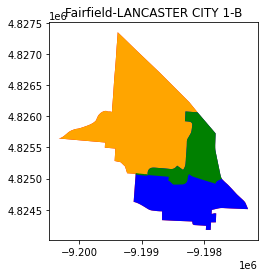

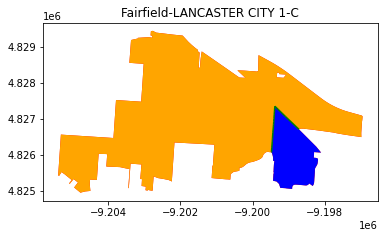

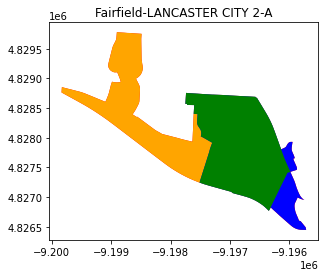

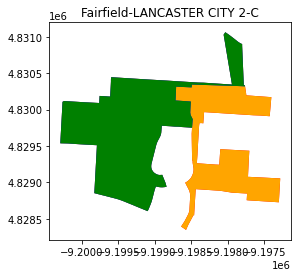

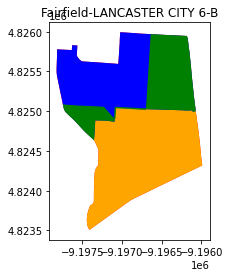

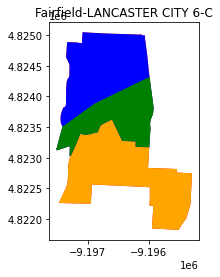

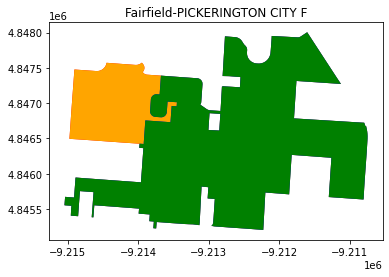

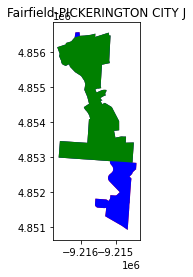

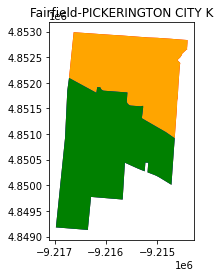

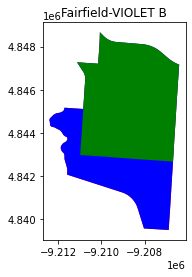

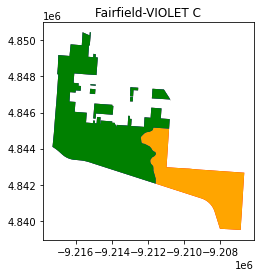

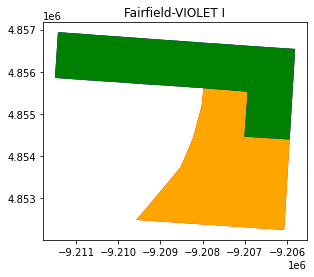

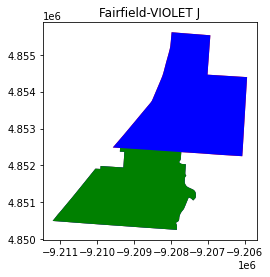

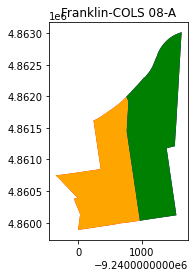

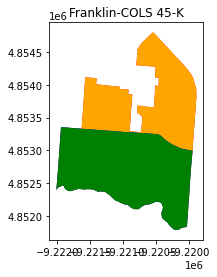

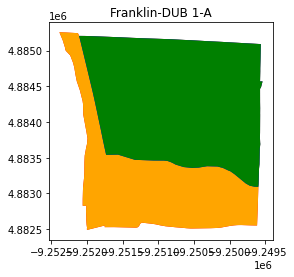

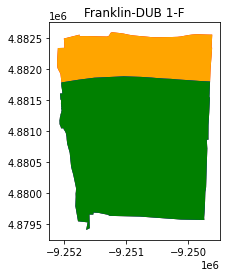

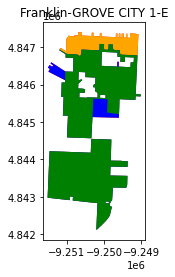

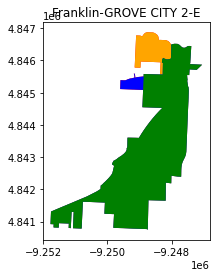

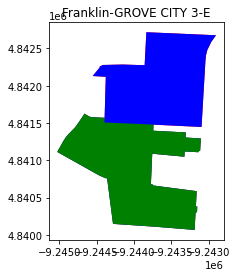

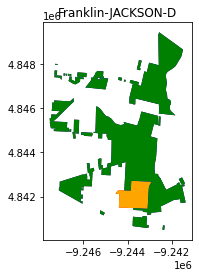

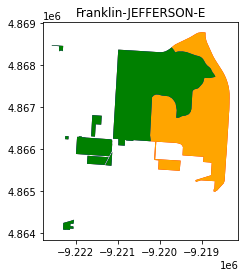

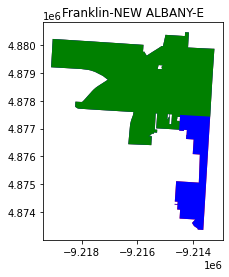

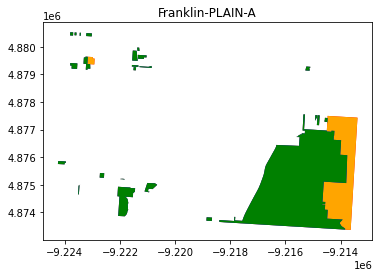

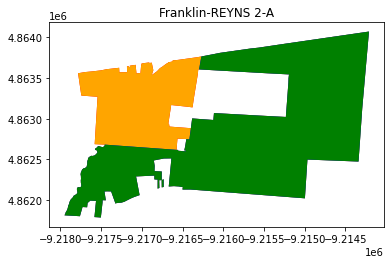

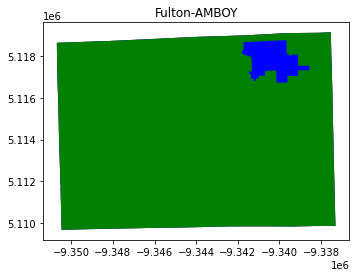

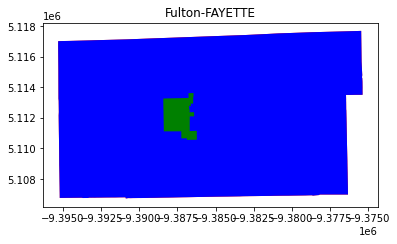

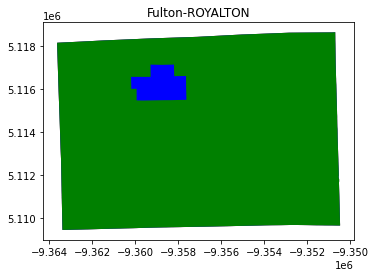

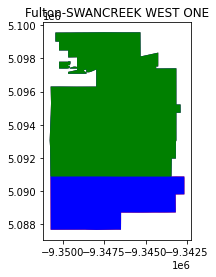

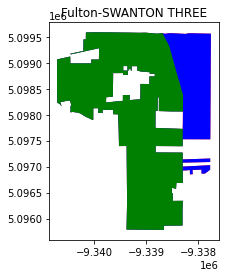

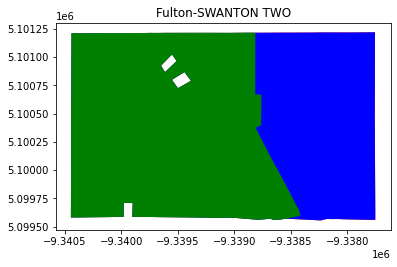

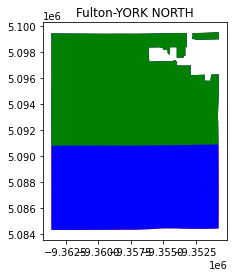

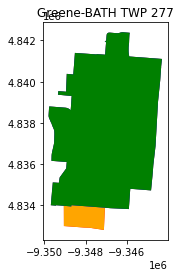

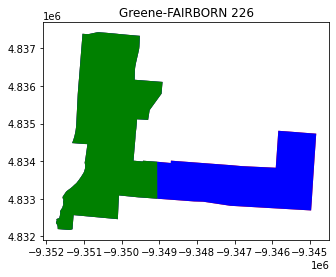

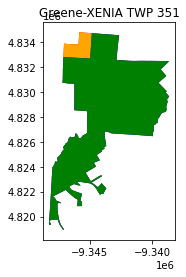

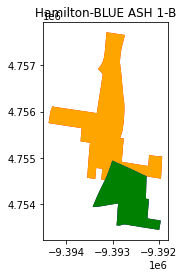

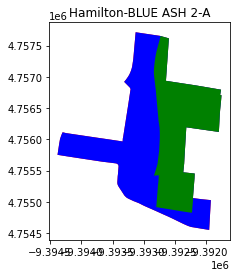

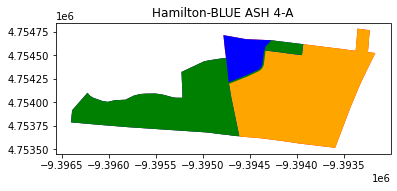

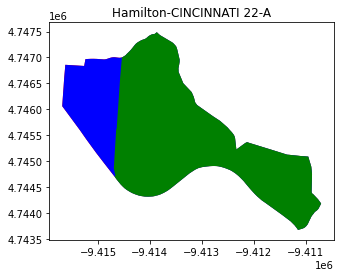

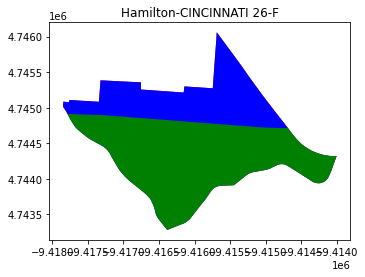

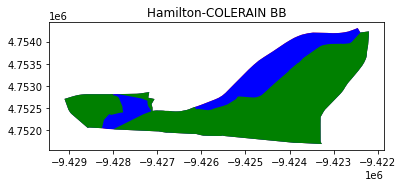

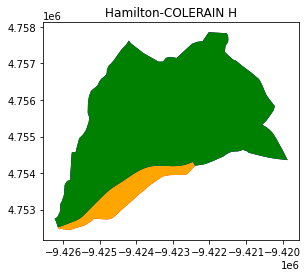

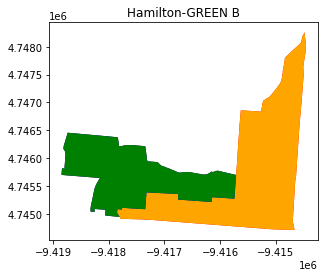

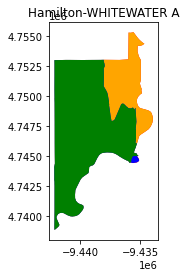

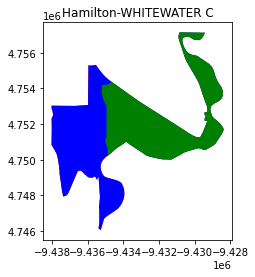

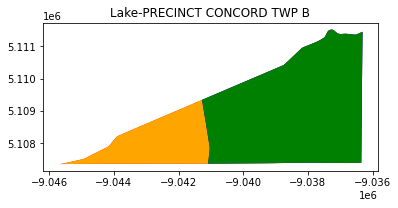

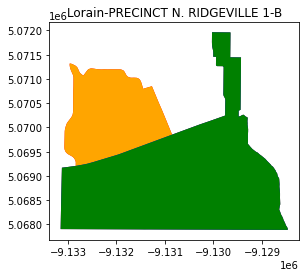

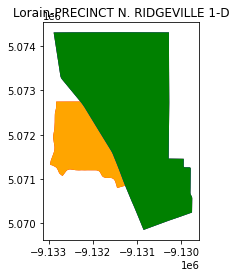

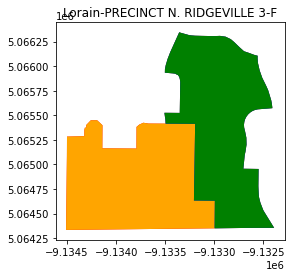

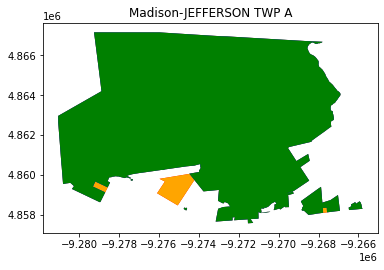

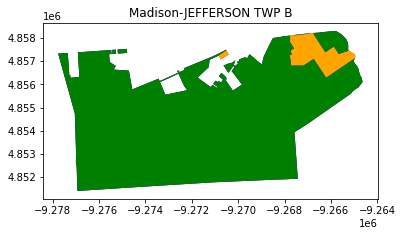

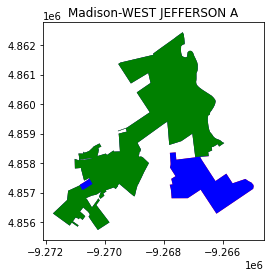

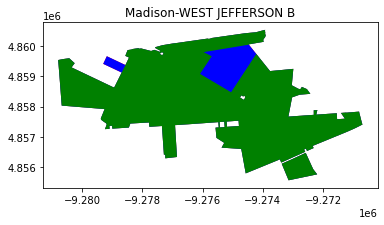

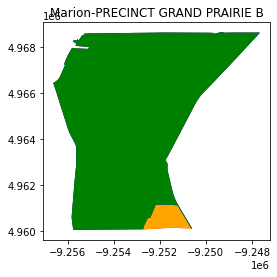

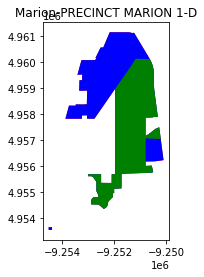

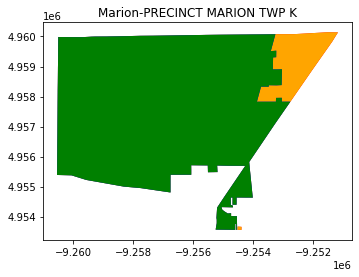

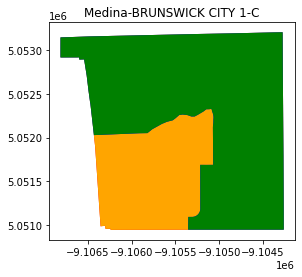

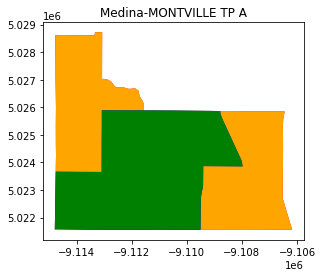

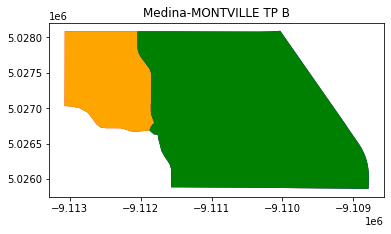

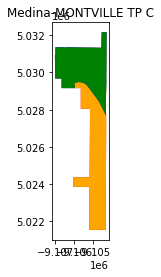

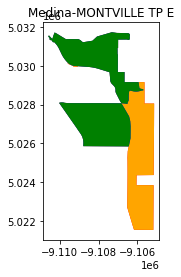

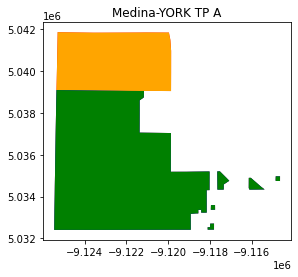

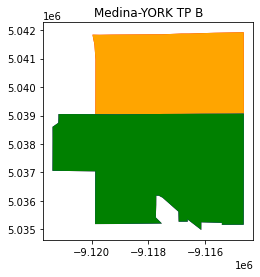

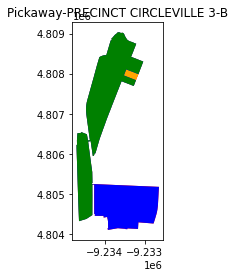

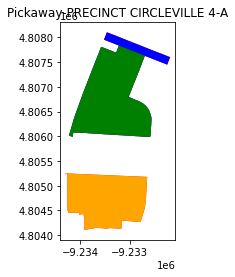

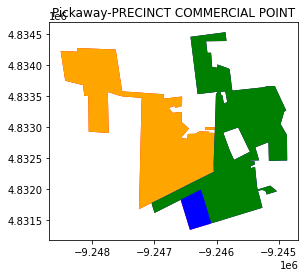

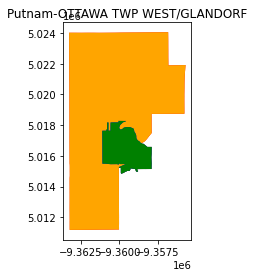

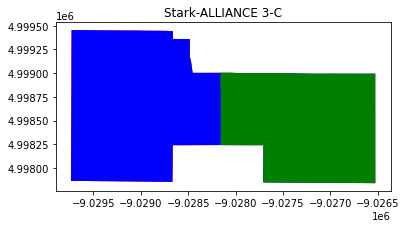

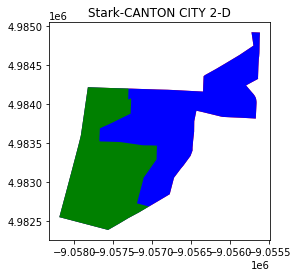

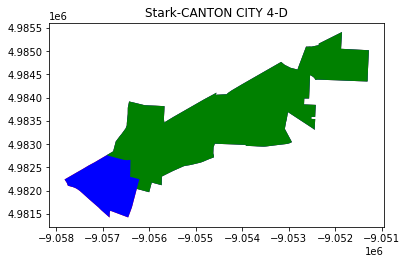

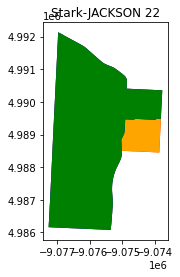

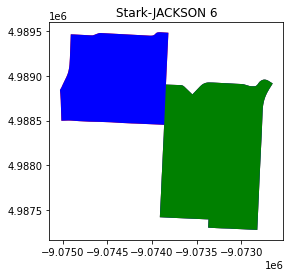

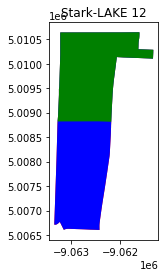

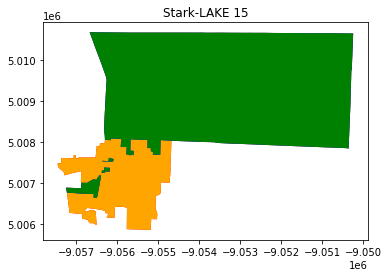

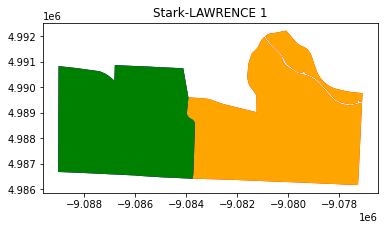

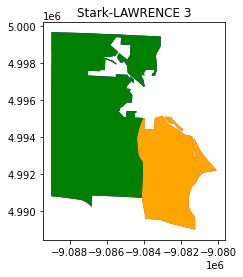

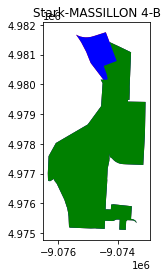

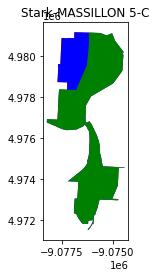

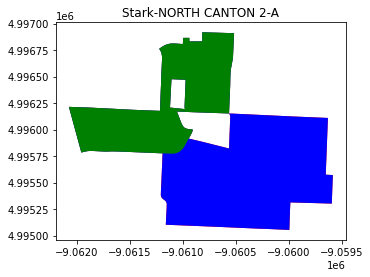

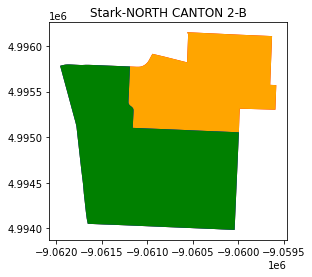

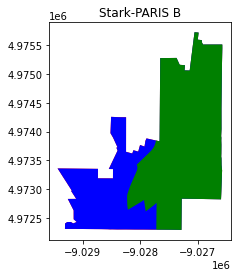

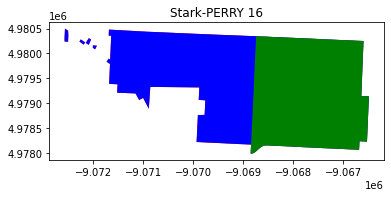

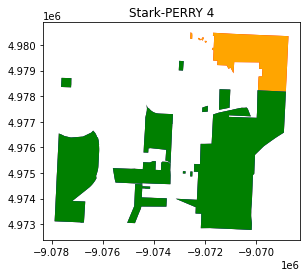

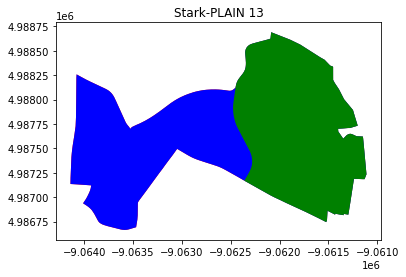

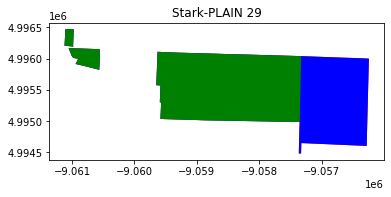

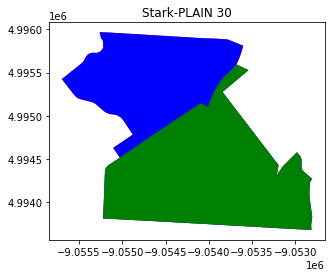

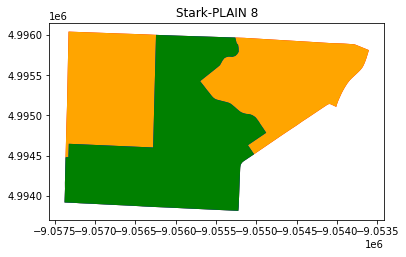

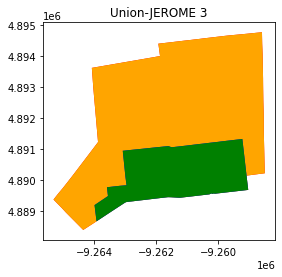

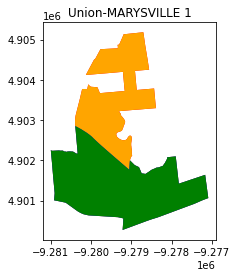

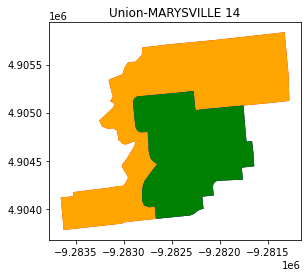

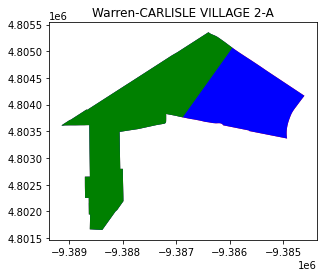

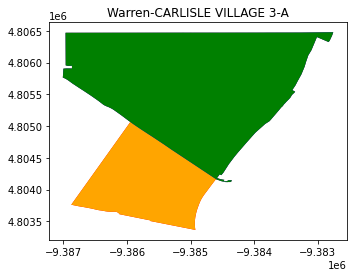

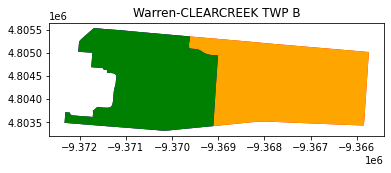

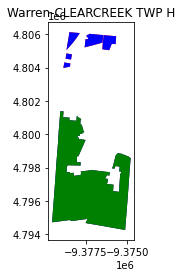

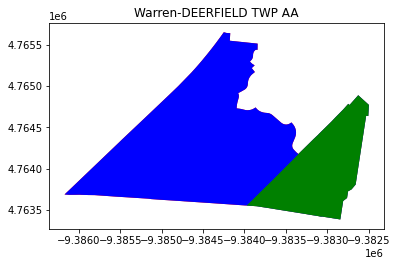

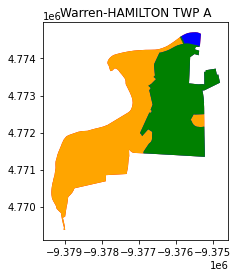

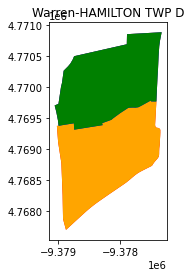

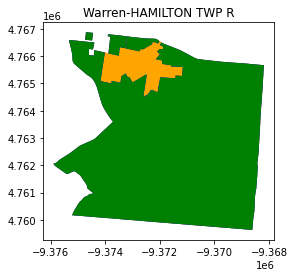

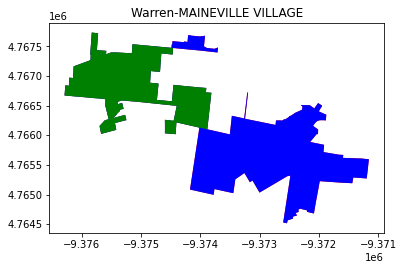

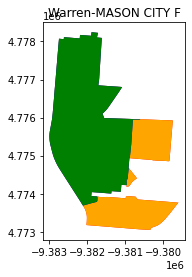

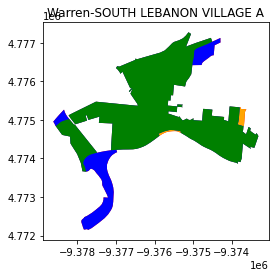

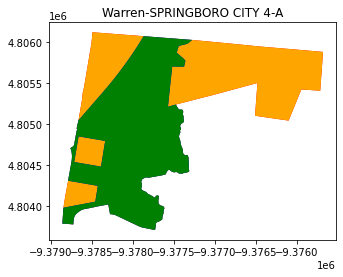

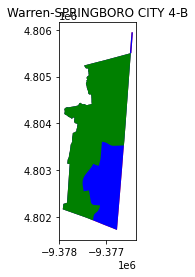

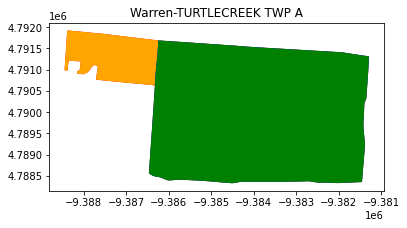

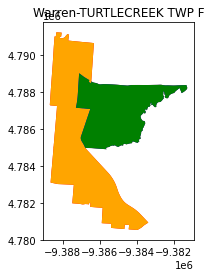

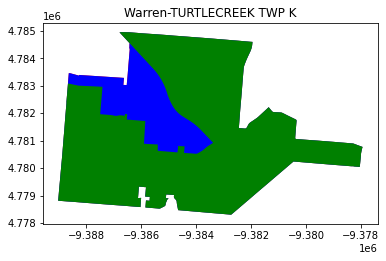

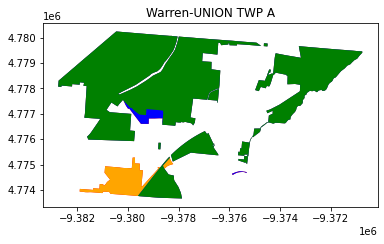

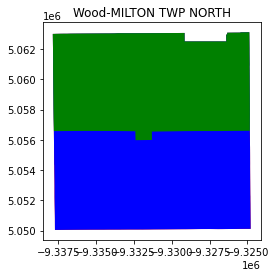

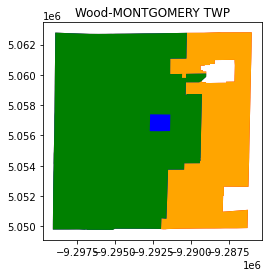

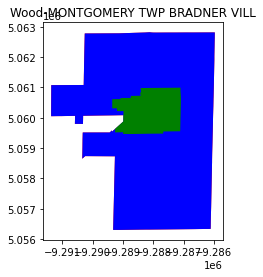

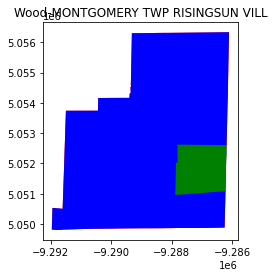

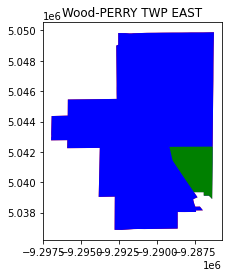

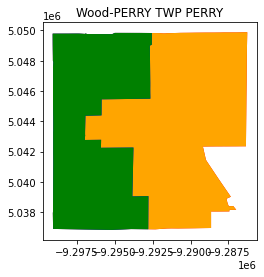

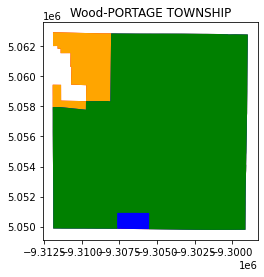

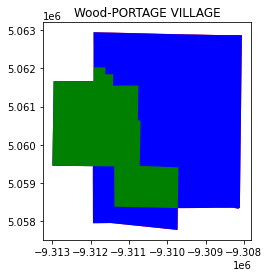

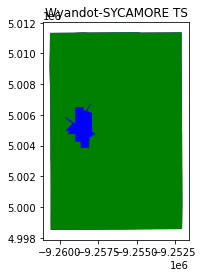

In [40]:
count = 0
area_list = []
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))

    if (area > .1):
        count += 1
        name = source_geoms.iat[i,64]
        
        print(str(count)+") For " + name + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

In [41]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and .1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between .1 and .5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between .5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")

(8879, 1)
8389 precincts w/ a difference of 0 km^2
343 precincts w/ a difference between 0 and .1 km^2
104 precincts w/ a difference between .1 and .5 km^2
16 precincts w/ a difference between .5 and 1 km^2
11 precincts w/ a difference between 1 and 2 km^2
9 precincts w/ a difference between 2 and 5 km^2
7 precincts w/ a difference greater than 5 km^2
